## Business Context: Working for an electric scooter renting company

### Goal: Understand and predict daily scooter rentals using linear regression

### Import libraries, clean the dataset, and preview the dataset

In [ ]:
# Import appropriate libraries
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# Load the CSV file
df_scooter = pd.read_csv('https://raw.githubusercontent.com/codymbaldwin/sample-files/master/scooter_rentals.csv')

In [ ]:
# Calculate the dimensions of the dataset
df_scooter.shape

(731, 14)

In [ ]:
# List the dataset's fields and data types
df_scooter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            731 non-null    int64  
 1   date          731 non-null    object 
 2   yr            731 non-null    int64  
 3   mnth          731 non-null    int64  
 4   weekday       731 non-null    int64  
 5   workday       731 non-null    int64  
 6   season        731 non-null    int64  
 7   holiday       731 non-null    int64  
 8   temp          731 non-null    float64
 9   atemp         731 non-null    float64
 10  hum           731 non-null    float64
 11  wind          731 non-null    float64
 12  unregistered  731 non-null    int64  
 13  registered    731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [ ]:
# Change field names for clearer understanding of dataset
df_scooter = df_scooter.rename(columns = {'yr':'year', 'mnth':'month', 'hum':'humidity_norm', 'temp':'temp_norm',
                                          'atemp':'temp_felt_norm', 'wind':'wind_norm', 'registered':'rentals_registered',
                                          'unregistered':'rentals_unregistered'})

In [ ]:
# Relist the fields to confirm that field names are changed
df_scooter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    731 non-null    int64  
 1   date                  731 non-null    object 
 2   year                  731 non-null    int64  
 3   month                 731 non-null    int64  
 4   weekday               731 non-null    int64  
 5   workday               731 non-null    int64  
 6   season                731 non-null    int64  
 7   holiday               731 non-null    int64  
 8   temp_norm             731 non-null    float64
 9   temp_felt_norm        731 non-null    float64
 10  humidity_norm         731 non-null    float64
 11  wind_norm             731 non-null    float64
 12  rentals_unregistered  731 non-null    int64  
 13  rentals_registered    731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [ ]:
# Preview df_scooter dataset
df_scooter.head()

,ID,date,year,month,weekday,workday,season,holiday,temp_norm,temp_felt_norm,humidity_norm,wind_norm,rentals_unregistered,rentals_registered
0,1,1/1/2011,0,1,6,0,1,0,0.344167,0.363625,0.805833,0.160446,331,654
1,2,1/2/2011,0,1,0,0,1,0,0.363478,0.353739,0.696087,0.248539,131,670
2,3,1/3/2011,0,1,1,1,1,0,0.196364,0.189405,0.437273,0.248309,120,1229
3,4,1/4/2011,0,1,2,1,1,0,0.200000,0.212122,0.590435,0.160296,108,1454
4,5,1/5/2011,0,1,3,1,1,0,0.226957,0.229270,0.436957,0.186900,82,1518


In [ ]:
# Change/replace the values in the "season" field
df_scooter['season'] = df_scooter['season'].replace([1,2,3,4], ["winter","spring","summer","fall"])

In [ ]:
# Create new column named "rentals_total" that sums registered and unregistered rentals
df_scooter['rentals_total'] = df_scooter['rentals_registered'] + df_scooter['rentals_unregistered']

In [ ]:
# Preview and confirm new fields are calculated and added to dataset
df_scooter.head()

,ID,date,year,month,weekday,workday,season,holiday,temp_norm,temp_felt_norm,humidity_norm,wind_norm,rentals_unregistered,rentals_registered,rentals_total
0,1,1/1/2011,0,1,6,0,winter,0,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,0,1,0,0,winter,0,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,0,1,1,1,winter,0,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,0,1,2,1,winter,0,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,0,1,3,1,winter,0,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Using pandas, generate descriptive statistics to better understand the scooter rental data in the df_scooter dataset. This will provide us with deeper insight into our data

In [ ]:
# Generate descriptive statistics on the dataset
df_scooter.describe()

,ID,year,month,weekday,workday,holiday,temp_norm,temp_felt_norm,humidity_norm,wind_norm,rentals_unregistered,rentals_registered,rentals_total
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.500684,6.519836,2.997264,0.683995,0.028728,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,3.451913,2.004787,0.465233,0.167155,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.000000,4.000000,1.000000,0.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,1.000000,7.000000,3.000000,1.000000,0.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,1.000000,10.000000,5.000000,1.000000,0.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,1.000000,12.000000,6.000000,1.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
# Create a pivot table with "year" and "seaons" as the indices, and that calculates the sum, min, and max for the "rentals_total" field
pd.pivot_table(df_scooter, index=['year', 'season'], values=['rentals_total'], aggfunc=[np.sum, np.min, np.max])

sum          amin          amax
            rentals_total rentals_total rentals_total
year season                                          
0    fall          326137           627          5511
     spring        347316           795          5805
     summer        419650          1115          6043
     winter        150000           431          3239
1    fall          515476            22          8555
     spring        571273          1027          8362
     summer        641479          4073          8714
     winter        321348           441          7836

In [ ]:
# Create a pivot table with "year" and "month" as the indices, and that calculates the sum and average of the rentals_total field
pd.pivot_table(df_scooter, index=['year', 'month'], values=['rentals_total'], aggfunc=[np.sum, np.mean])

sum          mean
           rentals_total rentals_total
year month                            
0    1             38189   1231.903226
     2             48215   1721.964286
     3             64045   2065.967742
     4             94870   3162.333333
     5            135821   4381.322581
     6            143512   4783.733333
     7            141341   4559.387097
     8            136691   4409.387097
     9            127418   4247.266667
     10           123511   3984.225806
     11           102167   3405.566667
     12            87323   2816.870968
1    1             96744   3120.774194
     2            103137   3556.448276
     3            164875   5318.548387
     4            174224   5807.466667
     5            195865   6318.225806
     6            202830   6761.000000
     7            203607   6567.967742
     8            214503   6919.451613
     9            218573   7285.766667
     10           198841   6414.225806
     11           152664   5088.800000
     12           123713   3990.741935

### Using seaborn, generate visualizations to clearly analyze the data in the df_scooter dataset

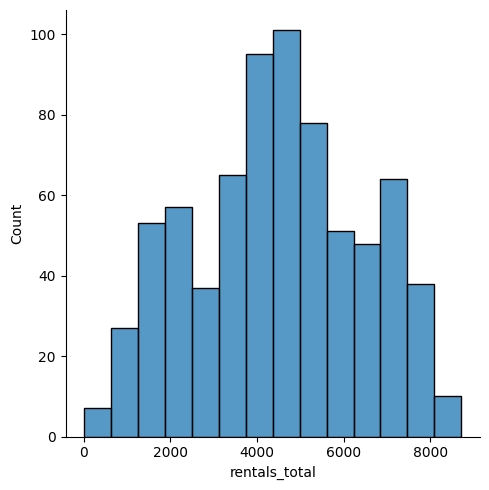

In [ ]:
# Generate a histogram to visually analyze the distribution of the "rentals_total" field
sns.displot(df_scooter, x='rentals_total')

<Axes: xlabel='rentals_unregistered', ylabel='rentals_registered'>

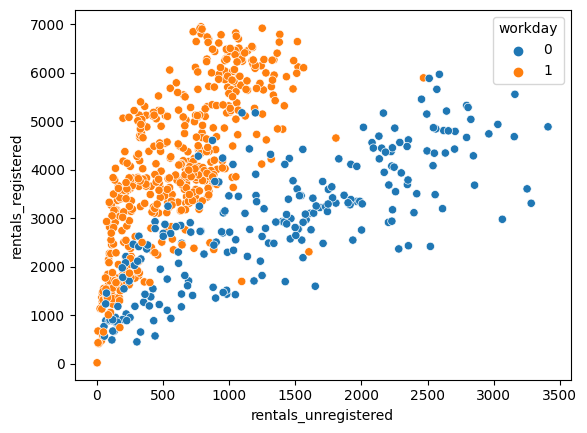

In [ ]:
# Create a scatterplot of unregistered rentals and registered rentals, filtered by workday.
# This will help us understand total scooter rentals between weekdays and weekends
sns.scatterplot(x='rentals_unregistered', y='rentals_registered', hue='workday' ,data=df_scooter)

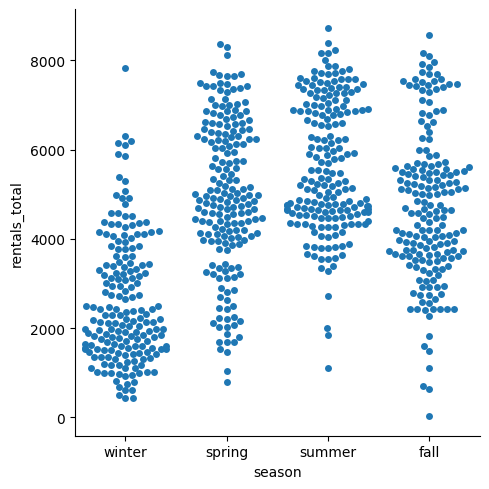

In [ ]:
# Generate a swarmplot to analyze the total rentals by season
sns.catplot(data=df_scooter, x='season', y='rentals_total', kind='swarm')

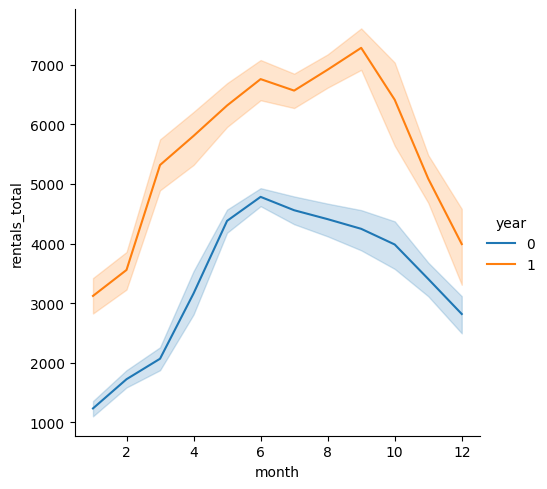

In [ ]:
# Generate a line plot that shows average daily rentals by month. Split the lines by year
sns.relplot(data=df_scooter, kind='line', x='month', y='rentals_total', hue='year')

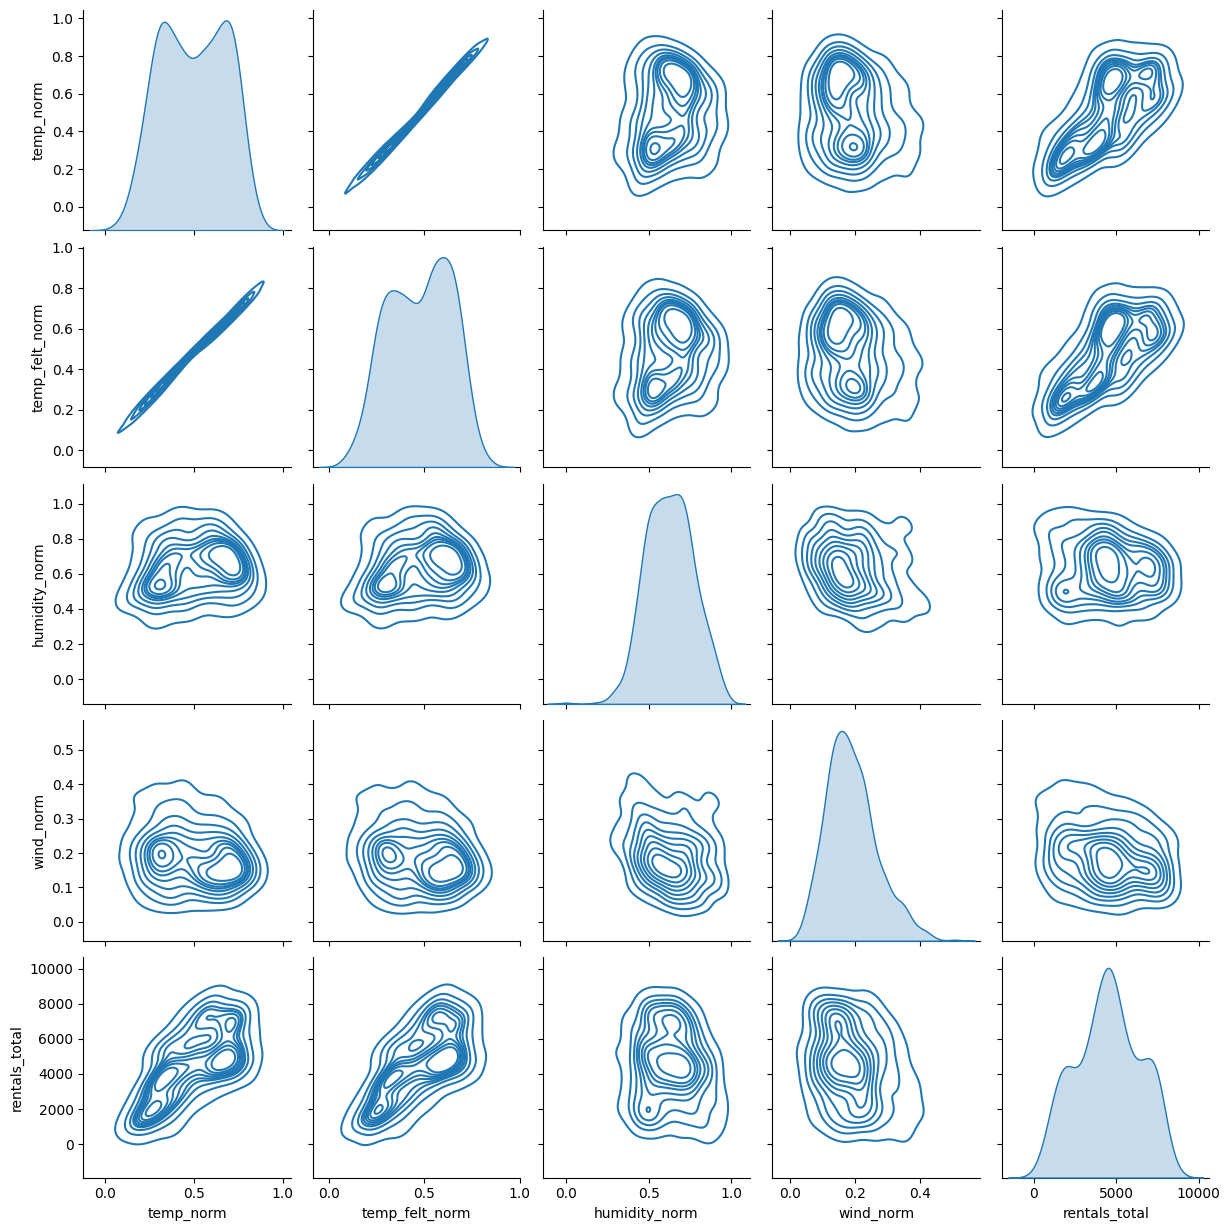

In [ ]:
# Generate a pairplot that shows the relationship between total rentals and all the weather indicators in the df_scooter dataset
sns.pairplot(df_scooter.iloc[:, [8,9,10,11,14]], kind='kde');

In [ ]:
# Create a correlation matrix between total rentals and all the weather indicators
df_scooter_weather = ["rentals_total", "temp_norm", "temp_felt_norm", "humidity_norm", "wind_norm"]

df_scooter_weather_corr = df_scooter[df_scooter_weather].corr()

<Axes: >

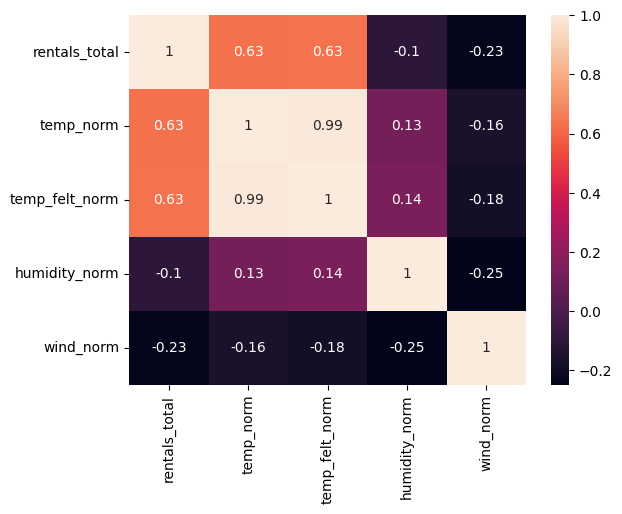

In [ ]:
# Generate a heatmap to visualize the correlation between total rentals and all the weather indicators
sns.heatmap(df_scooter_weather_corr, annot=True)

### Using linear regression, conduct a model building process to help predict daily scooter rentals

In [ ]:
# Before conducting a model build process, check to see if there are any rows with null values
df_scooter.isnull().sum()

ID                      0
date                    0
year                    0
month                   0
weekday                 0
workday                 0
season                  0
holiday                 0
temp_norm               0
temp_felt_norm          0
humidity_norm           0
wind_norm               0
rentals_unregistered    0
rentals_registered      0
rentals_total           0
dtype: int64

In [ ]:
# Seperate the dependent variable "rentals_total" and the independent variable "temp_norm"
y = df_scooter[['rentals_total']]
X = df_scooter[['temp_norm']]

In [ ]:
# Split the dataset into a training set (75%) and a test set (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=.75, random_state=0)

In [ ]:
# Train the model using linear regression
model = LinearRegression()
model.fit(X_train.values, y_train)

LinearRegression()

In [ ]:
# Intercept and coefficients of the "temp_norm" variable in our regression model
print(model.intercept_)
print(model.coef_)

[1327.93081037]
[[6463.96764523]]


In [ ]:
# Using the model, predict total rentals when "temp_norm" = .30
new_X = [[.30]]
model.predict(new_X)

array([[3267.12110394]])

In [ ]:
# Using the model, make predictions in the test data
y_pred = model.predict(X_test.values)

In [ ]:
# Calculate "r-squared" to evaluate the performance of the model. This will tell us how well our model fits the dataset
metrics.r2_score(y_test, y_pred)

0.37540464616240443